In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.utils import save_image

import copy

In [2]:
def get_default_device():
  """Helper function to choose cuda gpu if available, else cpu"""
  if(torch.cuda.is_available):
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [3]:
device = get_default_device()
device

device(type='cuda')

In [4]:
layers = ['0', '5', '10', '19', '28']

In [5]:
class VGG_mod(nn.Module):
  def __init__(self):
    super(VGG_mod, self).__init__()

    self.chosen_features = layers
    self.model = models.vgg19(pretrained=True).features[:29]

  def forward(self, x):
    features = []

    for layer_num, layer in enumerate(self.model):
      x = layer(x)

      if str(layer_num) in self.chosen_features:
        features.append(x)

    return features

In [6]:
img_size = 256

loader = transforms.Compose([
  transforms.Resize((img_size, img_size)),
  transforms.ToTensor()
])

def img_loader(img_name):
  image = Image.open(img_name)
  image = loader(image).unsqueeze(0) # giving it a batch size, in this case -> 1
  return image.to(device)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
style_path = # path for style image
content_path = # path for content image

style_img = img_loader(style_path)
content_img = img_loader(content_path)

In [9]:
plt.ion()

def show_img(img_tensor, title=None):
  image = img_tensor.cpu().clone()
  image = image.squeeze(0) # remove the batch size
  #image = unloader(image)
  plt.axis('off')
  plt.imshow(image.detach().permute(1, 2, 0))
  if title is not None:
    plt.title(title)

  plt.pause(0.001)

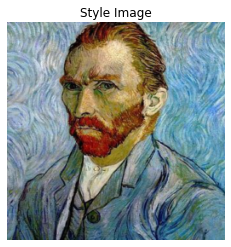

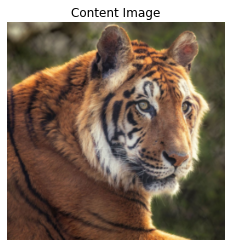

In [36]:
plt.figure()
show_img(style_img, "Style Image")

plt.figure()
show_img(content_img, "Content Image")

In [11]:
def gram_matrix(input):
  a, b, c, d = input.size()

  features = input.view(a*b, c*d)

  G = torch.mm(features, features.t())
  G = G.div(a*10) # normalizing it/making it smaller
  return G

In [37]:
generated_img = content_img.clone().requires_grad_(True)

total_epochs = 10000
lr = 0.0005
alpha = 1
beta = 0.0008

In [38]:
optimizer = optim.Adam([generated_img], lr=lr)

In [39]:
model = VGG_mod().to(device).eval()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(81.5391, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  0


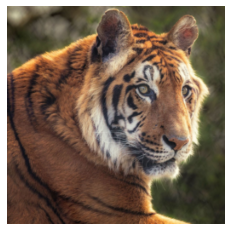

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(14.0013, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  200


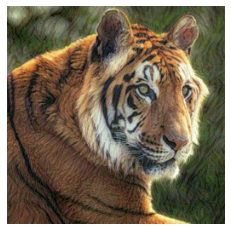

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(10.8509, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  400


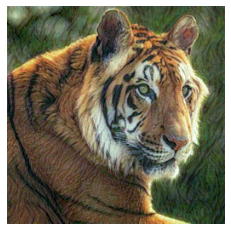

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(9.3948, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  600


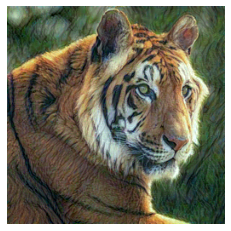

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(8.4047, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  800


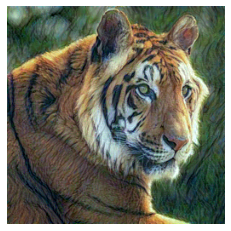

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(7.6814, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  1000


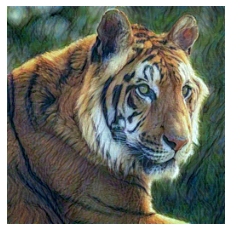

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(7.1680, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  1200


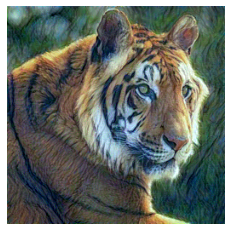

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.8250, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  1400


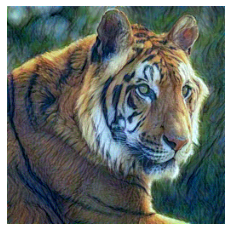

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.6172, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  1600


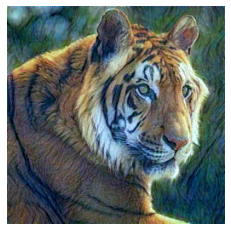

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.4983, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  1800


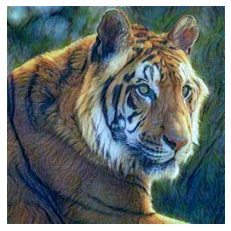

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.4241, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  2000


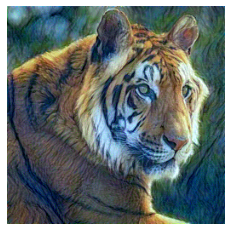

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.3704, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  2200


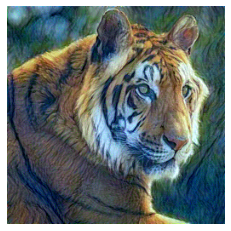

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.3285, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  2400


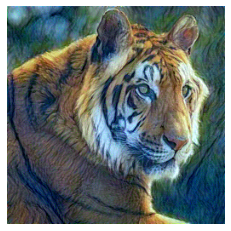

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.2938, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  2600


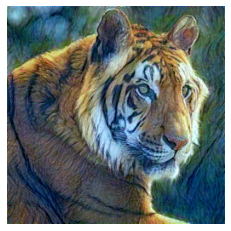

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.2636, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  2800


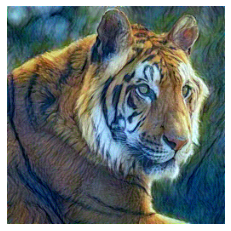

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.2376, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  3000


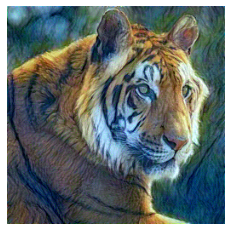

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.2144, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  3200


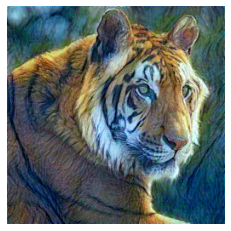

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.1941, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  3400


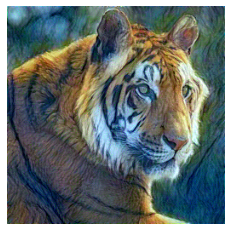

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.1761, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  3600


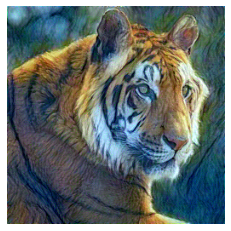

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.1598, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  3800


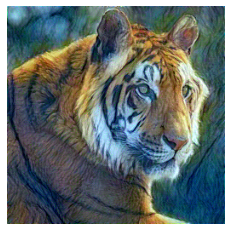

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.1450, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  4000


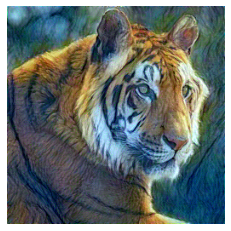

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.1316, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  4200


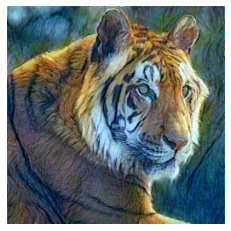

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.1193, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  4400


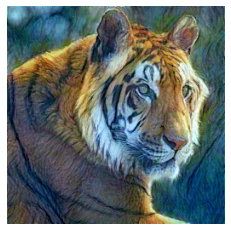

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.1077, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  4600


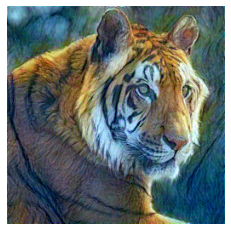

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0970, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  4800


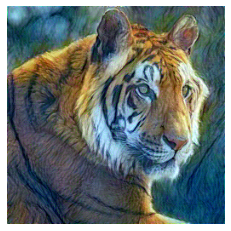

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0873, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  5000


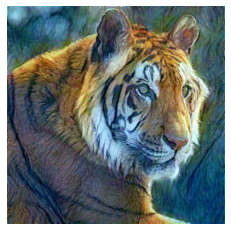

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0786, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  5200


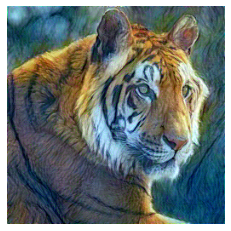

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0701, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  5400


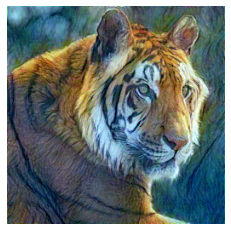

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0624, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  5600


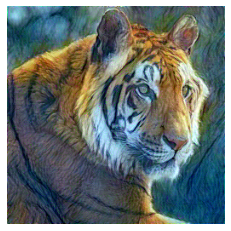

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0552, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  5800


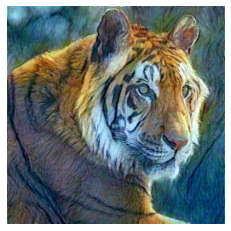

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0482, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  6000


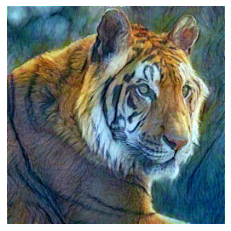

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0424, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  6200


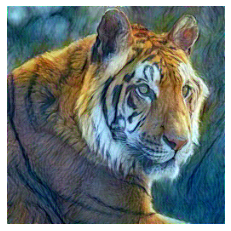

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0359, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  6400


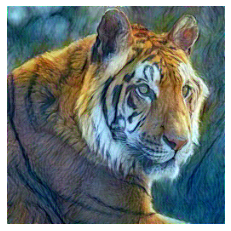

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0305, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  6600


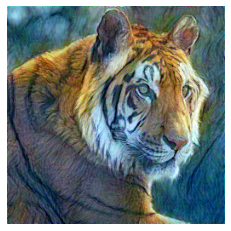

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0253, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  6800


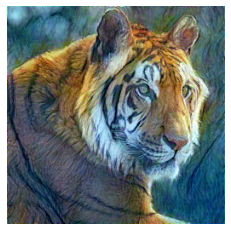

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0205, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  7000


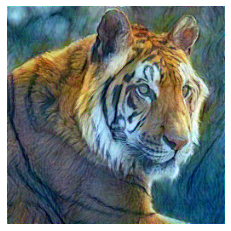

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0157, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  7200


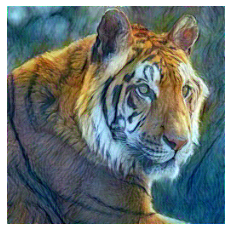

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0117, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  7400


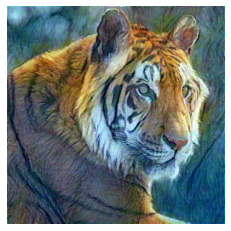

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0077, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  7600


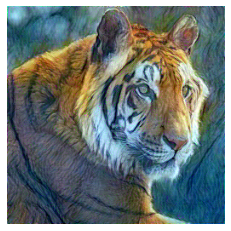

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0041, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  7800


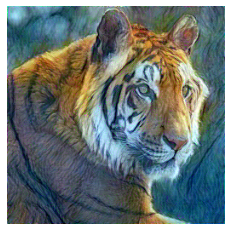

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6.0002, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  8000


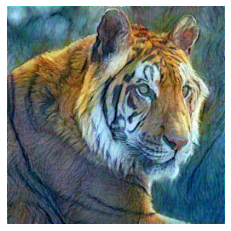

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(5.9973, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  8200


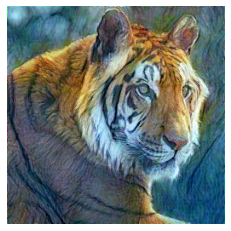

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(5.9942, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  8400


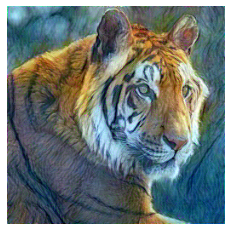

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(5.9909, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  8600


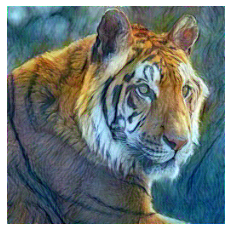

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(5.9881, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  8800


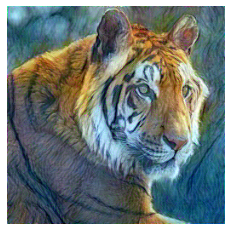

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(5.9857, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  9000


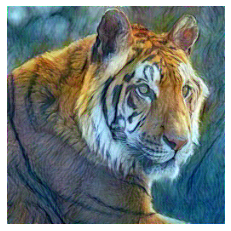

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(5.9831, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  9200


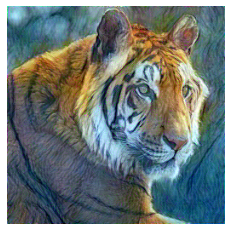

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(5.9811, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  9400


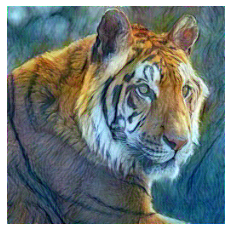

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(5.9787, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  9600


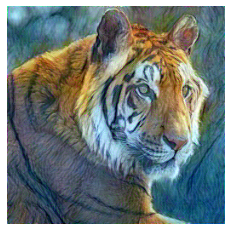

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(5.9764, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  9800


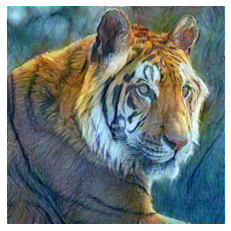

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(5.9746, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:  10000


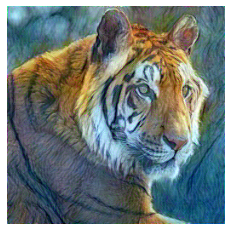

In [40]:
losses = []
for epoch in range(total_epochs+1):
  generated_features = model(generated_img)
  content_features = model(content_img)
  style_features = model(style_img)

  style_loss = 0
  content_loss = 0

  for gen_feature, con_feature, sty_feature in zip(generated_features, content_features, style_features):
    content_loss += F.mse_loss(gen_feature, con_feature)

    gen_gram = gram_matrix(gen_feature)
    sty_gram = gram_matrix(sty_feature)

    style_loss += F.mse_loss(gen_gram, sty_gram) 

  total_loss = alpha*content_loss + beta*style_loss
  losses.append(total_loss)
  optimizer.zero_grad()
  total_loss.backward()
  optimizer.step()

  if((epoch)%200 == 0):
    print(total_loss)
    print("Epoch: ", epoch)
    show_img(generated_img)

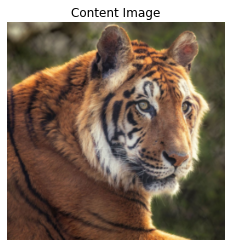

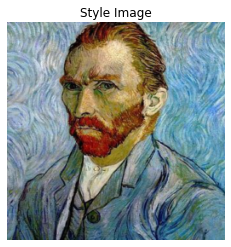

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


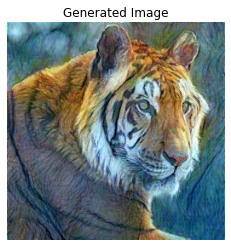

In [41]:
show_img(content_img, "Content Image")
show_img(style_img, "Style Image")
show_img(generated_img, "Generated Image")

Text(0.5, 1.0, 'Losses')

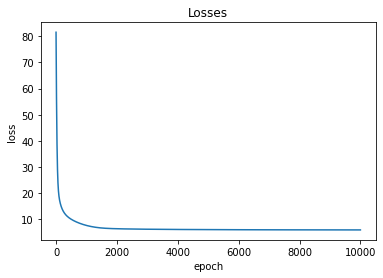

In [42]:
plt.plot(losses, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Losses')